### Evaluating ML Model 

- Three ways to evaluate Scikit-Learn Models/Estimators
    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric function ( included in scikit-learn docs: 3.3 Metrics and scoring : quantifying the quality of prediction)
    

In [2]:
# Imports 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn. ensemble import RandomForestClassifier


#### 1. Evaluating a Model with the Score Method

##### Classification Problem

In [21]:
# Importing heart diseases data
heart_disease = pd.read_csv("data/heart-disease.csv")
np.random.seed(42)
# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create Classifier Model Instance
clf = RandomForestClassifier()

# Fit (train) Classifier to the Training Data 
clf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
clf.score(X_test,y_test), clf.score(X_train,y_train) # the second: there is exposure to training data so it gets 100%. the first are the data that model haven't seen yet

(0.8524590163934426, 1.0)

##### Regression Problem

In [31]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Importing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() # a Dict
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"]) # df without target column
housing_df["target"] = housing["target"] # Complete Dataset

# Creating X and y
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Splitting Training and Test Data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# Instantiating Regression model
clf = RandomForestRegressor()

# Fit (train) model with Training data
clf.fit(X_train,y_train)


RandomForestRegressor()

In [32]:
# Evaluate model with Test Data ( with higher n_estimators it takes longer to compute but returns better accuracy)
# The default score() evaluation metric is r_squared for refression algorithm
clf.score(X_test, y_test)

0.8066196804802649

#### 2. Evaluating a Model using a Scoring Parameter

In [36]:
from sklearn.model_selection import  cross_val_score
# We will use Classification from above

# Importing heart diseases data
heart_disease = pd.read_csv("data/heart-disease.csv")
np.random.seed(42)
# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create Classifier Model Instance
clf = RandomForestClassifier()

# Fit (train) Classifier to the Training Data 
clf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
clf.score(X_test,y_test)

0.8524590163934426

In [38]:
cross_val_score(clf, X,y) # 5-foldCross Validation: scores 5 time with different sample splits of the data. default cv= 5

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [39]:
cross_val_score(clf, X,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [40]:
np.random.seed(42)

# Single training and test split score
clf_single = clf.score(X_test,y_test)

# Take mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X,y))

# Compare the two
clf_single, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [41]:
# Scoring Parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

##### 2.1 CLassification Model Evaluation Metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

 `1. Accuracy`

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # since we will use cross_val_score we don't need to split data

clf = RandomForestClassifier()
cross_v_score = cross_val_score(clf, X, y, cv=5)
cross_v_score


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [44]:
np.mean(cross_v_score)

0.8248087431693989

In [56]:
# Presenting Model's Accuracy
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_v_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


`2. Area Under the Receiving Operating Characteristic Curve (AUC/ROC)`

* Area Under Curve (AUC)
* ROC Curve

- Roc curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).
* True positive = Model predicts 1 when truth is 1 
* False positive = Model predicts 1 when truth is 0
* True negative = Model predicts 0 when truth is 0 
* False negative = Model predicts 0 when truth is 1 

In [63]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [66]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.16, 0.84],
        [0.49, 0.51],
        [0.78, 0.22],
        [0.55, 0.45],
        [0.1 , 0.9 ],
        [0.29, 0.71],
        [0.98, 0.02],
        [0.1 , 0.9 ],
        [0.46, 0.54]]),
 61)

In [68]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [69]:
# Calculate fpr, zpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

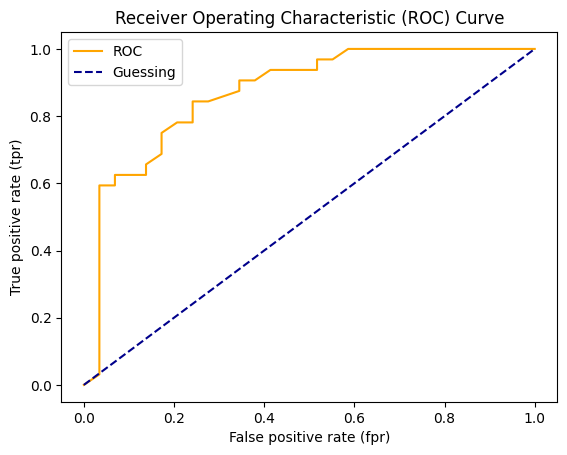

In [70]:
# Create function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

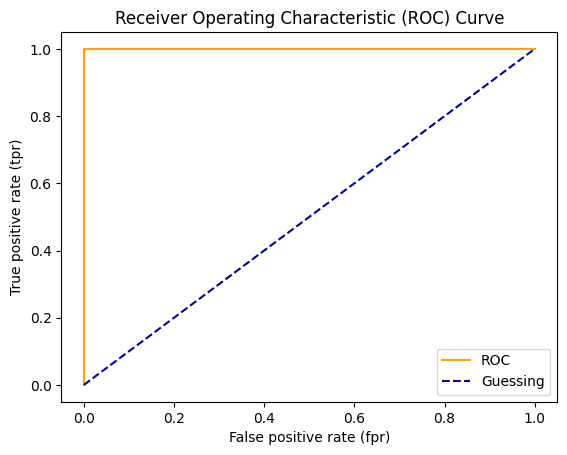

In [72]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [73]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

`3. Confusion Matrix`

- A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
- In essence, giving you and idea where the model is getting confused.

In [74]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]])

In [75]:
# Visualize confusion matrix with pd.crosstab() Note: when prediction = 0 Actual = 0 : 22/  when prediction = 1 Actual = 1 : 27/ false positive = 7/ false negative = 8 
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,22,7
1,5,27


In [76]:
22 + 7+ 5 + 27, len(y_preds)

(61, 61)

<AxesSubplot: >

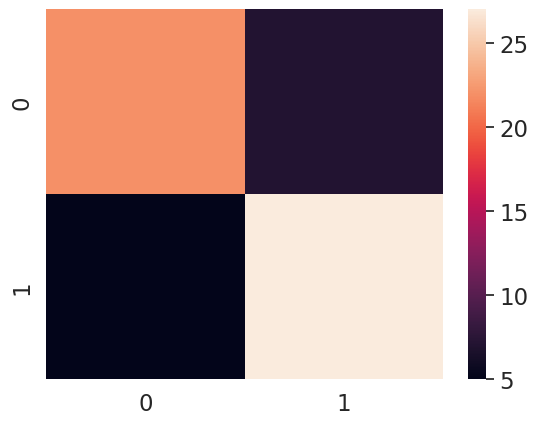

In [77]:
# Make our confusion matrix more visible with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

##### Creating a Confusion Matrix using Scikit-Learn

- To use the new methods of creating a confusion matrix with Scikit-Learn we need sklearn version > 1.0 

In [80]:
clf

RandomForestClassifier()

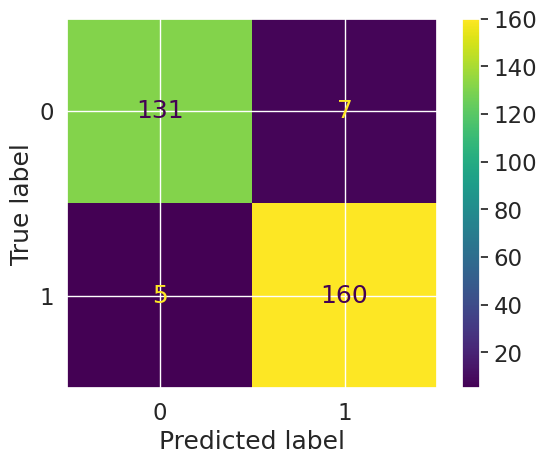

In [81]:
# First Method (In this method we use Whole X, y data, class method makes the prediction on them and plots matrix)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

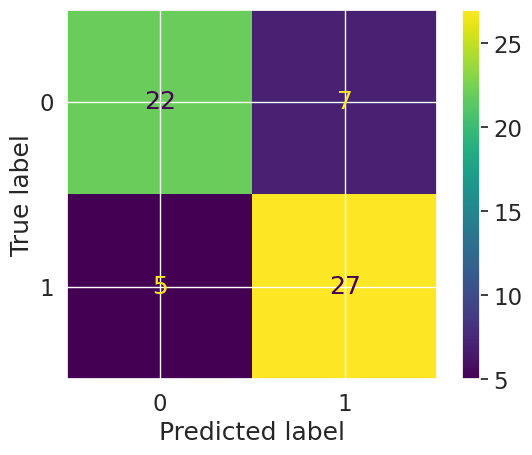

In [82]:
# Second Method (In this method we use y_test and predictions, class method works on predictions  and plots matrix)
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                         y_pred=y_preds)

`4. Classification report`

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) # Comparing true labels versus predictions

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



##### Classification Report Anatomy

- **Precision:** Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall:** Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 Score:** A combination of precision and recall. A perfect model achieves an F1 score of 1.0
- **Support:** The number of samples each metric was calculated on.
- **Accuracy:** The accuracy of a model  in decimal form. Perfect accuracy is equal to 1.0
- **Macro avg:** Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so if you do have class imbalances, pay attention to this metric.
- **Weighted avg:** Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give high value when one class out performs another due to having more samples).    


In [85]:
# Where precision and recall become valuable
disease_true = np.zeros(10000) 
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/dci-student/Python/A_Self_Study/data_science_ml_notes/env_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dci-student/Python/A_Self_Study/data_science_ml_notes/env_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dci-student/Python/A_Self_Study/data_science_ml_notes/env_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### `Check Scikit learn model evaluation documentation` 